# Generate patterns in time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from badgers.generators.time_series.changepoints import RandomChangeInMeanGenerator

## Generate data (gaussian white noise)

In [2]:
rng = np.random.default_rng(seed=0)

In [3]:
X = rng.normal(size=100, scale=0.25)
t = np.arange(100)

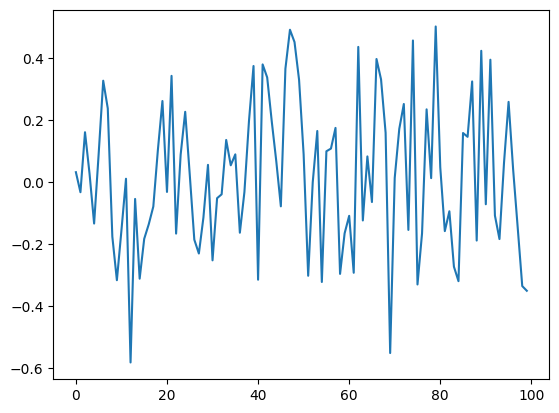

In [4]:
plt.plot(t, X)

## Randomly generate changepoints

In [19]:
generator = RandomChangeInMeanGenerator(max_change=2, min_change=-2, n_changepoints=5)

In [20]:
Xt, _ = generator.generate(X, None)

In [21]:
generator.changepoints

[(17, 0.28611932291904374),
 (11, -0.7125224356962314),
 (89, 0.3772001207987872),
 (52, -0.648355097971467),
 (37, -0.4335239978873551)]

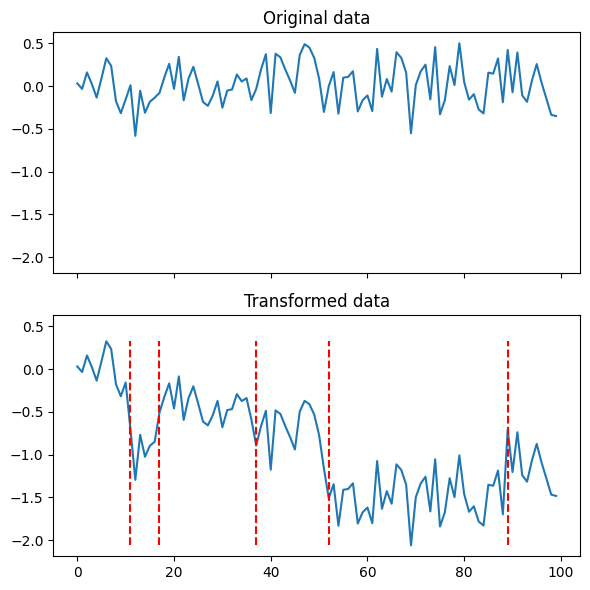

In [28]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
for cpt in generator.changepoints:
    axes[1].vlines(cpt[0], ymin=Xt.min(), ymax=Xt.max(), ls='--', color='r')
plt.tight_layout();